In [1]:
import initial_db

full_df = initial_db.get_data("A3-64")

import warnings

warnings.filterwarnings("ignore")


/home/rdave/Fall24/HVAC/hvac-VAV/data_analysis/util.py:21: FutureWarning: using <built-in method join of str object at 0x7e4643dad7f0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df["datetime"] = df["timestamp"].str.split(" ").str[:2].agg(" ".join)
/home/rdave/Fall24/HVAC/hvac-VAV/data_analysis/util.py:21: FutureWarning: using <built-in method join of str object at 0x7e4643dad7f0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df["datetime"] = df["timestamp"].str.split(" ").str[:2].agg(" ".join)


In [2]:
import util
import seaborn as sns

filtered_df = util.filter_setpoint(full_df)
# util.graph_df_temp(full_df[:5000], filtered_df)

In [3]:
import numpy as np
import pandas as pd

new_df = util.split_by_occupancy(filtered_df, full_df)

In [4]:
import matplotlib.pyplot as plt

# graph_filtered_setpoint(filtered_df, full_df)

agg_df = util.remove_asymptotes(new_df, full_df)


In [7]:
# def simplify_occurrences(df):
#     final_data = []
#     list_of_df = [d for _, d in df.groupby(df.index - np.arange(len(df)))]

#     for new_df in list_of_df:
#         this_occurrence = new_df.loc[new_df.index[0]]
#         this_occurrence["TimeToStable"] = (
#             new_df.iloc[-1].datetime - this_occurrence.datetime
#         ).total_seconds() // 60
#         final_data.append(this_occurrence)

#     return pd.DataFrame(final_data)

final_df = util.simplify_occurrences(agg_df)
final_df

,DprPos,FlSpt,HwVlvPos,RmTmp,RmTmpCspt,RmTmpHpst,SaFl,datetime,OaDewPt,OaHum,OaWetBlb,OaTmp,TempDiff,TimeToStable
714,5.882812,150.0,53.125000,70.296875,73.359375,71.359375,139.0,2020-10-17 04:15:00,NaN,NaN,NaN,NaN,3.062500,30.0
810,0.000000,150.0,89.843750,69.132812,72.953125,70.953125,149.0,2020-10-18 04:15:00,NaN,NaN,NaN,NaN,3.820312,30.0
906,2.000000,150.0,89.843750,69.437500,73.234375,71.234375,140.0,2020-10-19 04:15:00,NaN,NaN,NaN,NaN,3.796875,60.0
1578,12.546875,150.0,70.703125,69.593750,72.898438,70.898438,176.0,2020-10-26 04:15:00,NaN,NaN,NaN,NaN,3.304688,30.0
1866,0.000000,150.0,96.093750,69.203125,73.125000,71.125000,153.0,2020-10-29 04:15:00,NaN,NaN,NaN,NaN,3.921875,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47712,2.093750,150.0,100.000000,67.851562,73.148438,71.148438,137.0,2022-03-28 20:15:00,10.10,45.22,26.92,23.19,5.296875,30.0
48704,9.843750,150.0,68.359375,69.921875,73.289062,71.289062,167.0,2022-04-08 04:15:00,49.35,97.42,49.23,49.35,3.367188,15.0
49538,67.570312,800.0,0.000000,76.484375,73.039062,71.039062,773.0,2022-04-16 20:45:00,44.03,92.17,44.70,45.41,3.445312,15.0
49927,28.789062,800.0,0.000000,76.250000,72.945312,70.945312,167.0,2022-04-20 22:00:00,26.87,42.91,39.21,47.59,3.304688,15.0


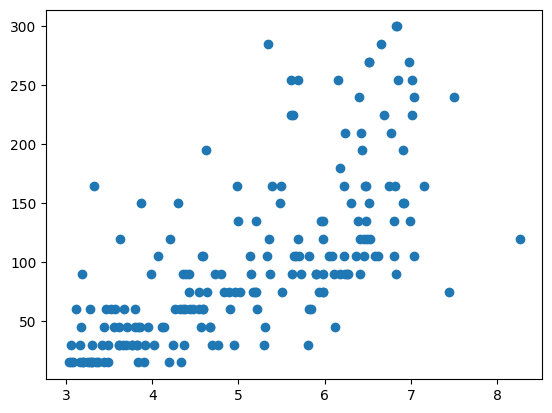

In [8]:
util.scatter_temp_diff_vs_time_room(final_df)

In [9]:
import os

# def get_full_data_rooms():
#     df_list = []
#     list_files = os.listdir("../data/occupancy_data")

#     for f in list_files:
#         this_room = f[f.index("A") : f.index(".csv")]
#         print(this_room)

#     return df_list


room_list = initial_db.get_full_data_rooms()
df_list = []

# fig, ax = plt.subplots()
# for df in df_list:
#     ax.scatter(df.TempDiff, df.TimeToStable, '.')

# plt.show()

In [10]:
for room in room_list:
    full_df = initial_db.get_data(room)
    filtered_df1 = util.filter_setpoint(full_df)
    filtered_df = util.split_by_occupancy(filtered_df1, full_df)
    agg_df = util.remove_asymptotes(filtered_df, full_df)
    final_df = util.simplify_occurrences(agg_df)
    df_list.append(final_df)

print(df_list)

[           DprPos  FlSpt    HwVlvPos      RmTmp  RmTmpCspt  RmTmpHpst   SaFl  \
24      23.218750  250.0  100.000000  68.085938  72.492188  70.492188  245.0   
486     23.273438  250.0  100.000000  68.242188  73.171875  71.171875  290.0   
584     22.656250  250.0   85.546875  68.875000  72.585938  70.585938  259.0   
963     18.226562  250.0  100.000000  64.890625  73.000000  71.000000  163.0   
1636    23.664062  250.0  100.000000  66.359375  72.929688  70.929688  256.0   
...           ...    ...         ...        ...        ...        ...    ...   
125248  60.414062  900.0    0.000000  74.226562  68.476562  66.476562  900.0   
125804   4.250000  900.0    0.000000  74.710938  68.375000  66.375000  153.0   
125910  57.804688  900.0    0.000000  72.882812  68.343750  66.343750  919.0   
126000  55.406250  900.0    0.000000  72.679688  68.289062  66.289062  898.0   
126399  60.625000  900.0    0.000000  72.687500  68.375000  66.375000  864.0   

                  datetime    OaDewPt 

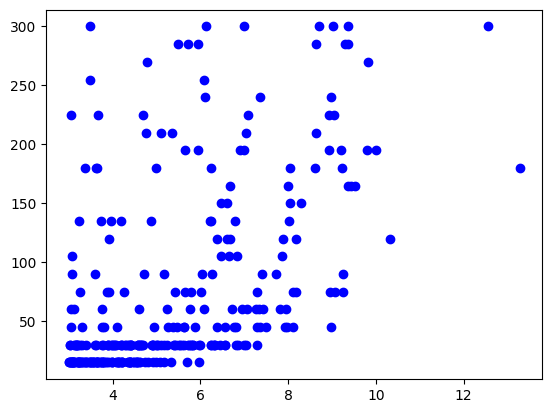

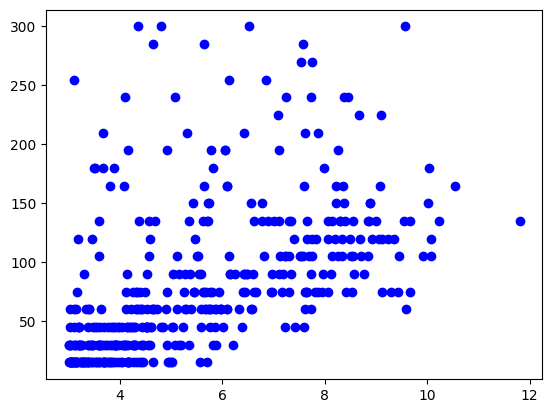

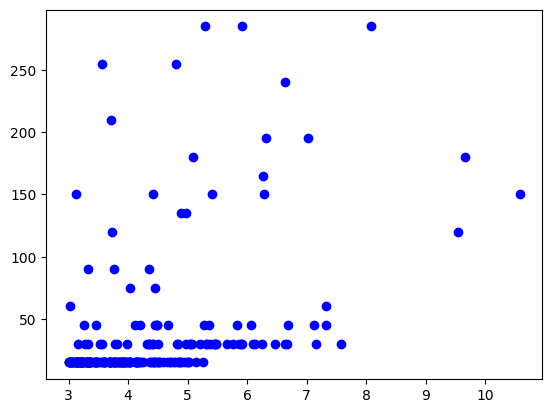

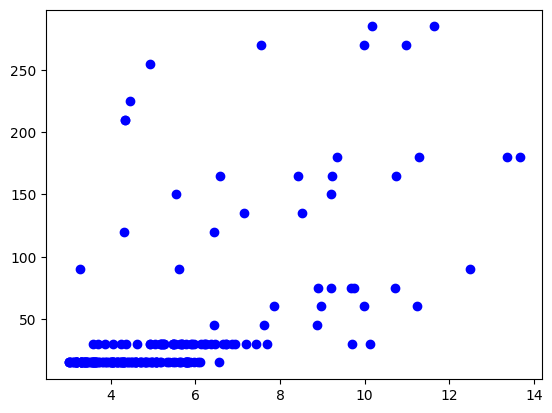

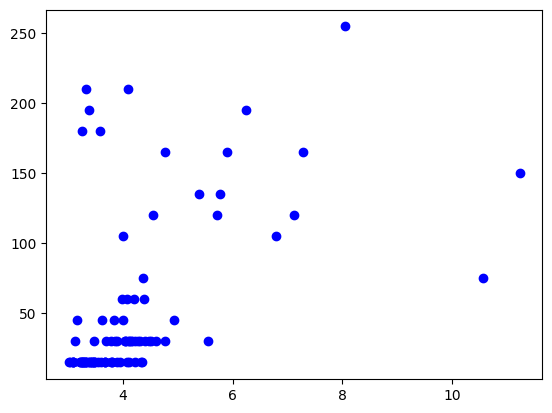

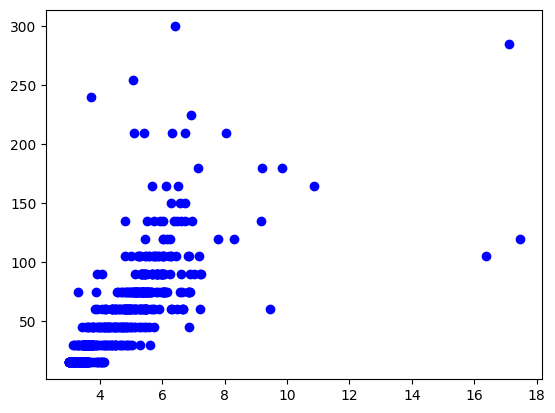

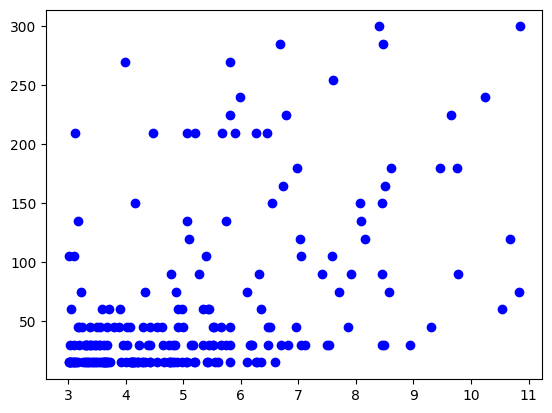

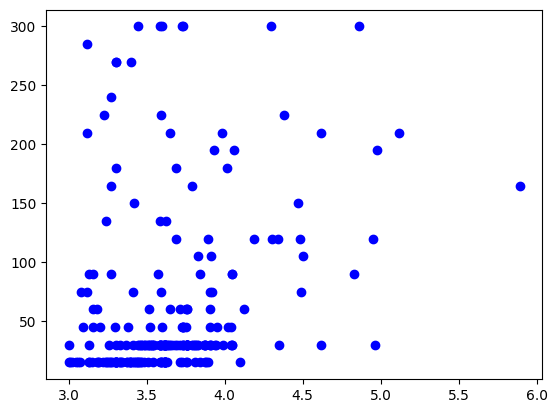

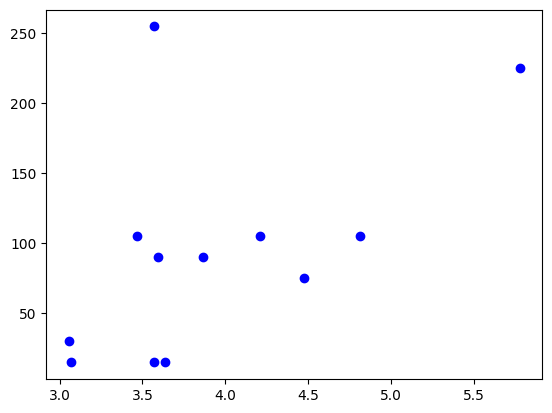

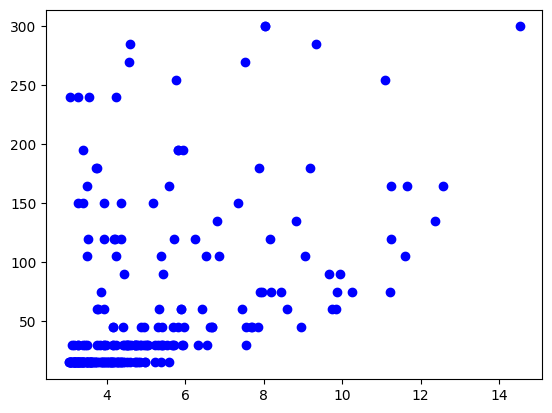

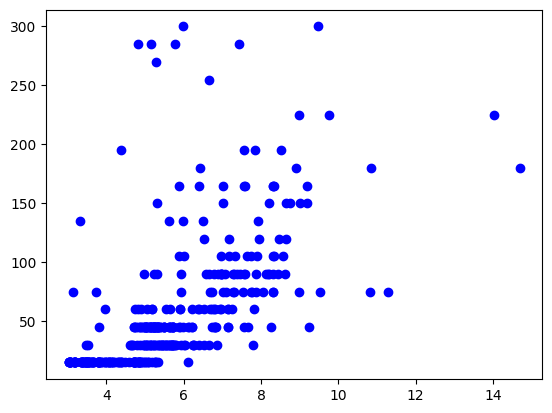

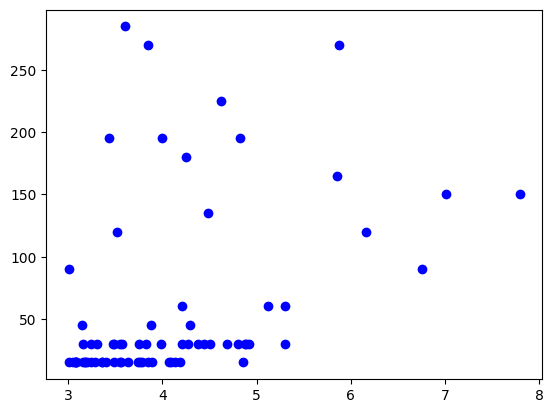

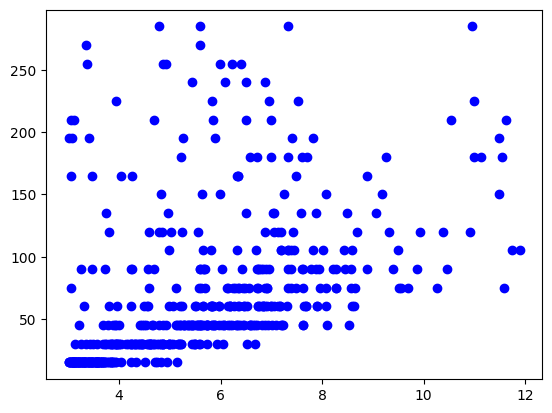

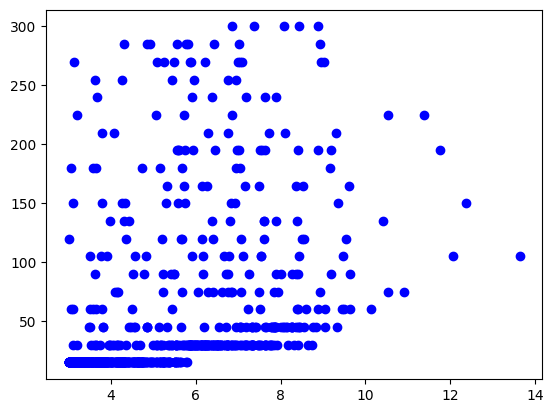

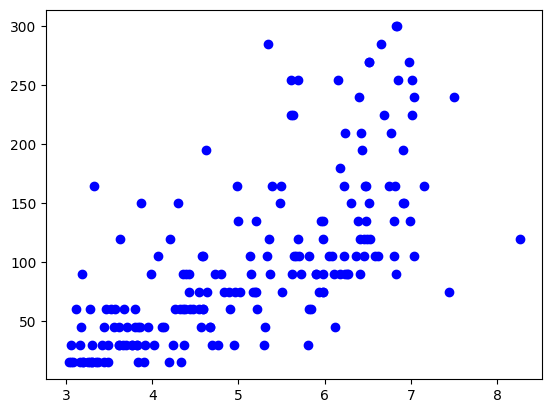

In [12]:
def scatter_temp_diff_vs_time_all_room(df_list):
    for df in df_list:
        if len(df) > 0:
            plt.scatter(df.TempDiff, df.TimeToStable, c='b')
            plt.show()

scatter_temp_diff_vs_time_all_room(df_list)